In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import SpectralCoclustering
from sklearn.datasets import make_blobs
from anti_clustering import ExactClusterEditingAntiClustering
from sklearn import datasets
import pandas as pd
from pathlib import Path
import re

import os
import glob2
import scipy

In [7]:
from scipy.linalg import det
from itertools import combinations

def is_totally_unimodular(matrix):
    rows, cols = matrix.shape
    min_dim = min(rows, cols)
    
    # Check all square submatrices of the given matrix
    for size in range(1, min_dim + 1):
        row_combinations = combinations(range(rows), size)
        col_combinations = combinations(range(cols), size)
        
        for row_indices in row_combinations:
            for col_indices in col_combinations:
                submatrix = matrix[np.ix_(row_indices, col_indices)]
                determinant = round(det(submatrix))
                if determinant not in [0, 1, -1]:
                    return False
    return True

matrix = np.array([
    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
])

if is_totally_unimodular(matrix):
    print("The matrix is totally unimodular.")
else:
    print("The matrix is not totally unimodular.")


KeyboardInterrupt



In [2]:
p = 4
k = 3
inst_name = 'ruspini'

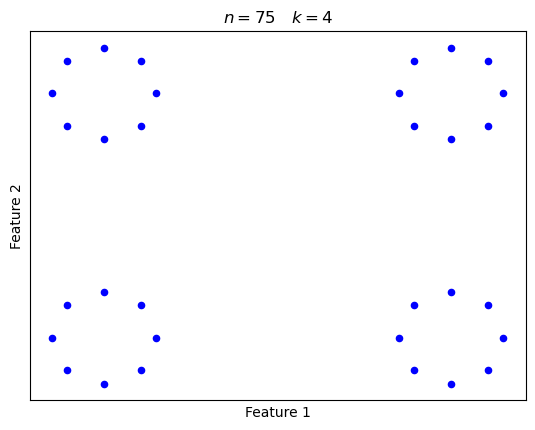

Done!


In [40]:
result_path = '\\\wsl.localhost\\Ubuntu-22.04\\home\\aelle\\mr-sos-dp\\datasets\\' + inst_name + '.txt'
with open(result_path, 'r') as file:
    data = np.loadtxt(file)
    n = data.shape[0]-1
    plt.scatter(data[1:,0], data[1:,1], s=20, c='b')
    plt.grid(False)
    plt.title("$n=75$   $k=4$")
    plt.xticks([])
    plt.yticks([])
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

print('Done!')

In [25]:
result_path = '\\\wsl.localhost\\Ubuntu-22.04\\home\\aelle\\mr-sos-dp\\datasets\\results\\' + str(p) + "part\\" + inst_name + "\\"
color_map = ["r", "g", "b", "y", "m", "c", "k", "orange", "purple", "pink", "gray", "olive", "brown"]
marker_map = ["o", "<", ">", "D", "*", ".", ",", "v", "^"]
if os.path.exists(result_path):
    for file in glob2.glob(result_path + "*.txt"):
        if ("OPT" in str(file)):
            #part = np.loadtxt(file, usecols=0).astype(int)
            #point = np.loadtxt(file, usecols=1).astype(int)
            data = np.loadtxt(file, usecols=range(0,2))
            
            plt.title("Optimal Solution")
            for c in range(0,k):
                cls = np.loadtxt(file, usecols=2+c)
                j = np.where(cls == 1)
                plt.scatter(data[j+1,0], data[j+1,1], s=20, c=color_map[c], label=c+1)
            plt.legend(title="Cluster", loc = "lower right")
            plt.xlabel("Feature 1")
            plt.ylabel("Feature 2")
            plt.xticks([])
            plt.yticks([])
            #plt.savefig(result_path + file + ".png", bbox_inches='tight')
            plt.show()

print('Done!')

Done!


In [3]:
result_path = '\\\wsl.localhost\\Ubuntu-22.04\\home\\aelle\\mr-sos-dp\\datasets\\results\\' + str(p) + "part\\" + inst_name + "\\"
color_map = ["r", "g", "b", "y", "m", "c", "k", "orange", "purple", "pink", "gray", "olive", "brown"]
marker_map = ["o", "<", ">", "D", "*", ".", ",", "v", "^"]
if os.path.exists(result_path):
    for file in glob2.glob(result_path + "*.txt"):
        if ("KM" in str(file)):
            #part = np.loadtxt(file, usecols=0).astype(int)
            #point = np.loadtxt(file, usecols=1).astype(int)
            data = data[1:]
            
            plt.title("(Bad) Initial Solution $\Delta^0(S)$")
            for c in range(0,k):
                cls = np.loadtxt(file, usecols=c)
                j = np.where(cls == 1)
                plt.scatter(data[j,0], data[j,1], s=50, c=color_map[c], label="$C_" + str(c+1) + "$")
            plt.legend(title="Cluster", loc= "lower right")
            plt.xlabel("Feature 1")
            plt.ylabel("Feature 2")
            plt.xticks([])
            plt.yticks([])
            plt.savefig(result_path + "hsol1.png", bbox_inches='tight')
            plt.show()

print('Done!')

NameError: name 'data' is not defined

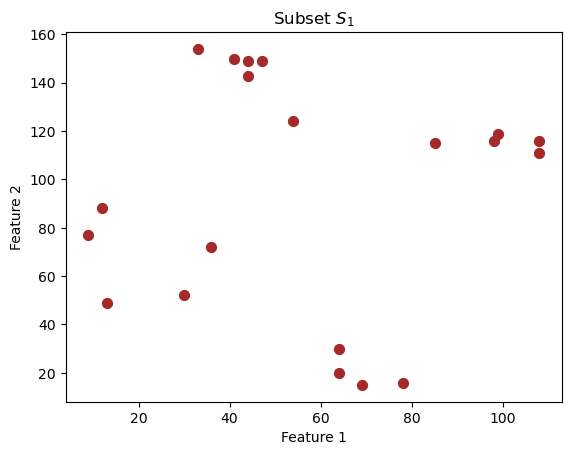

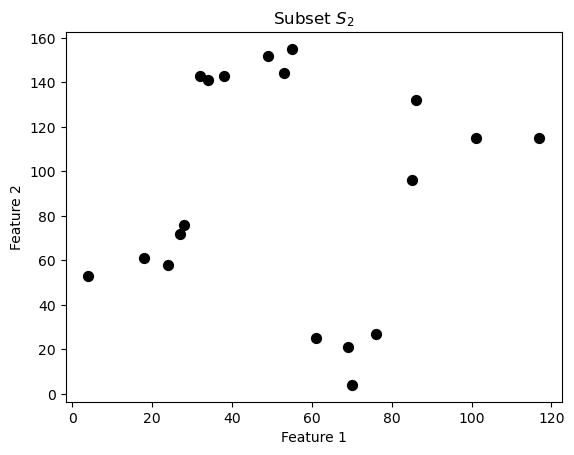

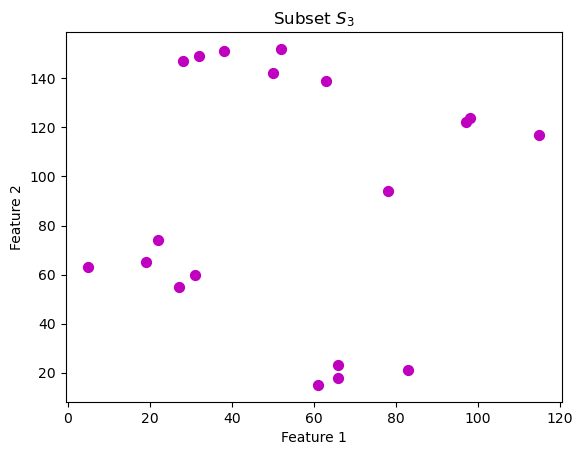

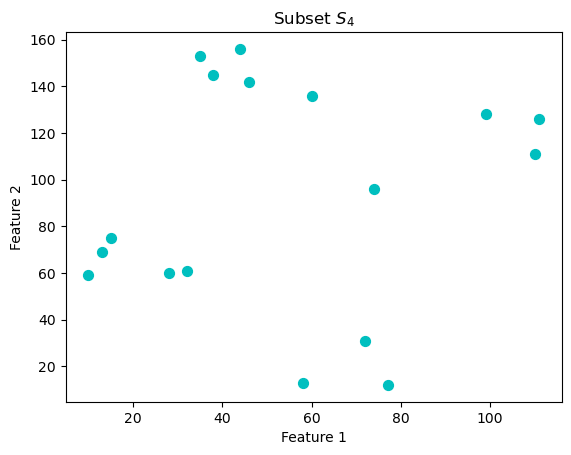

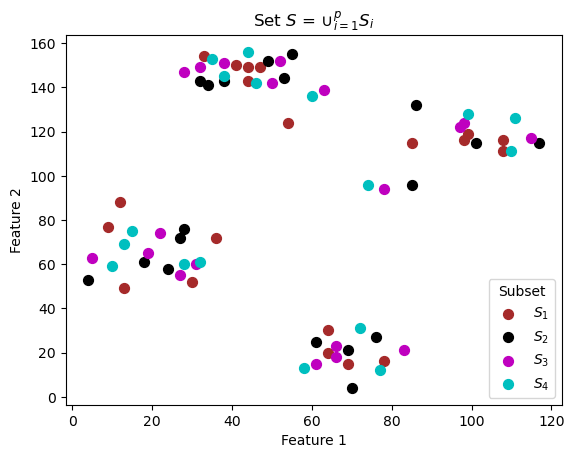

Done!


In [5]:
result_path = '\\\wsl.localhost\\Ubuntu-22.04\\home\\aelle\\mr-sos-dp\\datasets\\results\\' + str(p) + "part\\" + inst_name + "\\"
color_map = ["k", "brown", "k", "m", "c", "b"]
marker_map = [".", "o", "D", "^", ",", "v", "^", "<", ">"]
for pp in range(0,p):
    file = result_path + inst_name + "_" + str(k) + "_PART_" + str(pp) + ".txt"
                #part = np.loadtxt(file, usecols=0).astype(int)
                #point = np.loadtxt(file, usecols=1).astype(int)
    data = np.loadtxt(file, usecols=range(0,2))
    num_p = pp + 1
    plt.scatter(data[:,0], data[:,1], s=50, c=color_map[num_p])
                
    plt.title("Subset $S_" + str(num_p) + "$")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    #plt.xticks([])
    #plt.yticks([])
    plt.savefig(result_path + "part" + str(num_p) + ".png", bbox_inches='tight')
    plt.show()

for pp in range(0,p):
    file = result_path + inst_name + "_" + str(k) + "_PART_" + str(pp) + ".txt"
                #part = np.loadtxt(file, usecols=0).astype(int)
                #point = np.loadtxt(file, usecols=1).astype(int)
    data = np.loadtxt(file, usecols=range(0,2))
    num_p = pp + 1
    plt.scatter(data[:,0], data[:,1], s=50, c=color_map[num_p], label="$S_" + str(num_p) + "$")
                
plt.title("Set $S$ = $\cup_{i=1}^p S_i$")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
#plt.xticks([])
#plt.yticks([])
plt.legend(title="Subset", loc="lower right")
plt.savefig(result_path + "parttot.png", bbox_inches='tight')
plt.show()

print('Done!')

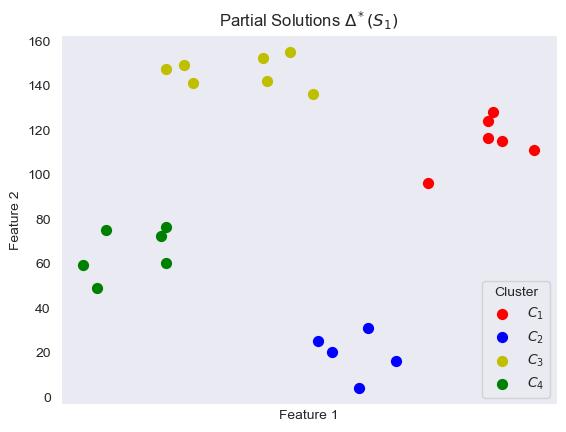

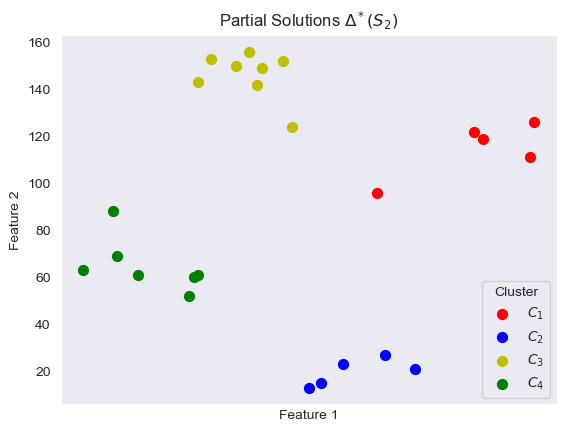

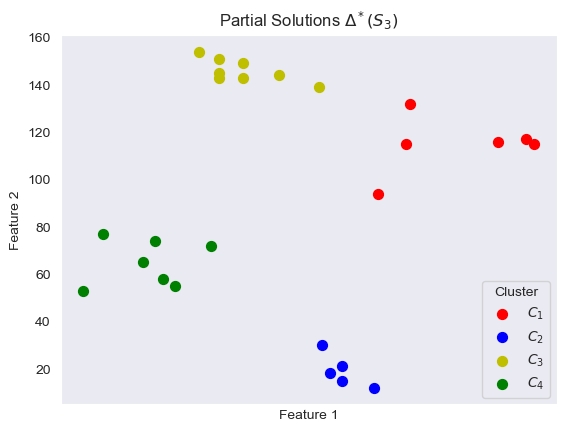

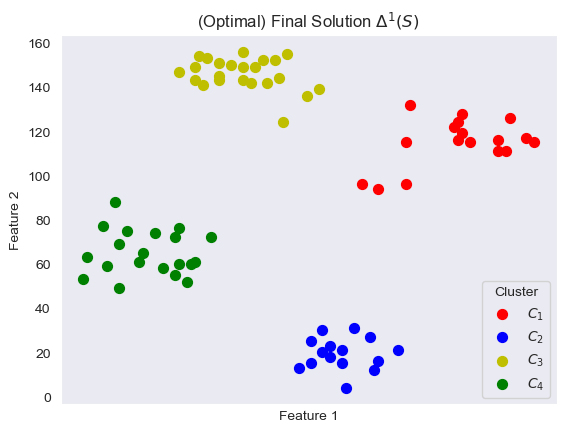

Done!


In [4]:
color_map = ["r", "b", "y", "g", "m", "c", "k", "orange", "purple", "pink", "gray", "olive", "brown"]
if os.path.exists(result_path):
    for file in glob2.glob(result_path + "*.txt"):
        if (str(k) + "_UB" in str(file)):
            part = np.loadtxt(file, usecols=0).astype(int)
            point = np.loadtxt(file, usecols=1).astype(int)
            data = np.loadtxt(file, usecols=range(2,4))
            cls = np.loadtxt(file, usecols=4).astype(int)
            n = point.shape[0]
            for h in range(0,p):
                for c in range(1,k+1):
                    j = np.where((cls == c-1) & (part == h))[0]
                    plt.scatter(data[j,0], data[j,1], s=50, c=color_map[c-1], label="$C_" + str(c) + "$")
                plt.title("Partial Solutions $\Delta^*(S_" + str(h+1) + ")$")
                plt.legend(title="Cluster", loc = "lower right")
                plt.grid(False)
                plt.xlabel("Feature 1")
                plt.ylabel("Feature 2")
                plt.xticks([])
                plt.savefig(result_path + "cls" + str(h+1) + ".png", bbox_inches='tight')
                plt.show()
                
            
            plt.title("(Optimal) Final Solution $\Delta^1(S)$")
            for c in range(1,k+1):
                j = np.where(cls == c-1)
                plt.scatter(data[j,0], data[j,1], s=50, c=color_map[c-1], label="$C_" + str(c) + "$")
            plt.legend(title="Cluster", loc = "lower right")
            plt.grid(False)
            plt.xlabel("Feature 1")
            plt.ylabel("Feature 2")
            plt.xticks([])
            plt.savefig(result_path + "clstot.png", bbox_inches='tight')
            plt.show()

print('Done!')

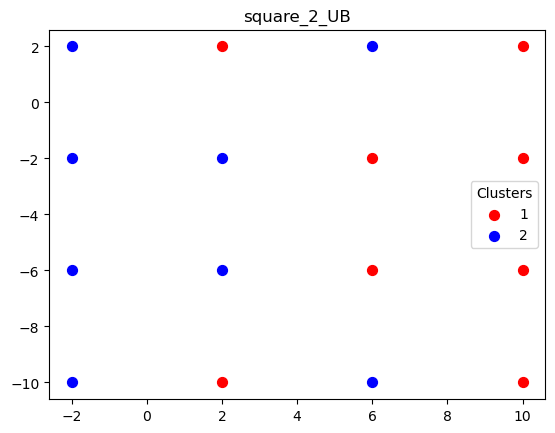

Done!


In [29]:
if os.path.exists(result_path):
    for file in glob2.glob(result_path + "*.txt"):
        if "UB" in str(file):
            part = np.loadtxt(file, usecols=0).astype(int)
            point = np.loadtxt(file, usecols=1).astype(int)
            data = np.loadtxt(file, usecols=range(2,4))
            cls = np.loadtxt(file, usecols=4).astype(int)
            n = point.shape[0]
            for c in np.unique(cls):
                j = np.where(cls == c)
                plt.scatter(data[j,0], data[j,1], s=50, c=color_map[c], label=c+1)
            file = Path(file).stem
            plt.title(file)
            plt.legend(title="Clusters")
            #plt.savefig(result_path + file + ".png", bbox_inches='tight')
            plt.show()

print('Done!')

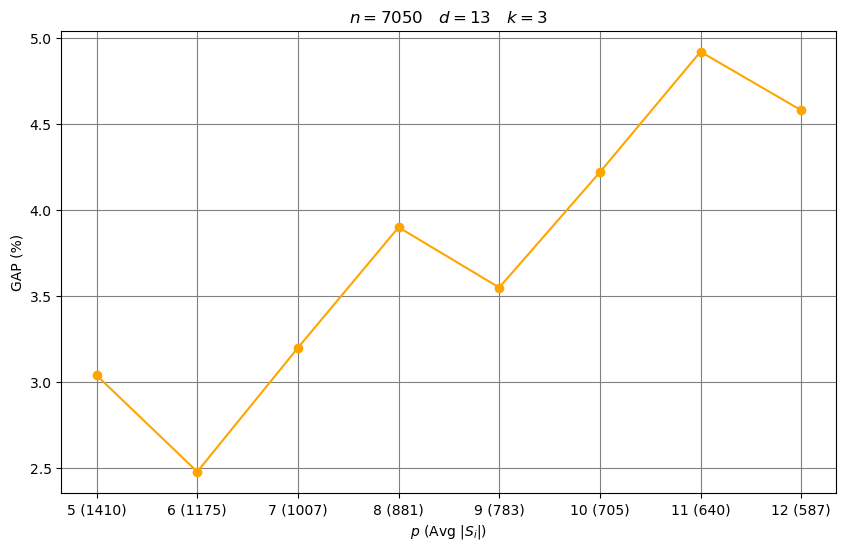

In [30]:
result_path = 'C:\\Users\\moden\\OneDrive - uniroma1.it\\Desktop\\'
partial_sol = [12, 11, 10, 9, 8, 7, 6, 5]
gap = [4.58, 4.92, 4.22, 3.55, 3.90, 3.2, 2.48, 3.04]
total_points = 7050

# Calculate the average number of points per partial solution
avg_points_per_partial_sol = [total_points // ps for ps in partial_sol]
x_labels = [f'{ps} ({avg})' for ps, avg in zip(partial_sol, avg_points_per_partial_sol)]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(partial_sol, gap, marker='o', linestyle='-', color='orange')

# Adding title and labels
plt.title('$n=7050$   $d=13$   $k=3$')
plt.xlabel('$p$ (Avg |$S_i$|)')
plt.ylabel('GAP (%)')

# Display the plot
plt.xticks(partial_sol, x_labels)
plt.grid(True, color='grey')
plt.savefig(result_path + "trend.png", bbox_inches='tight')
plt.show()

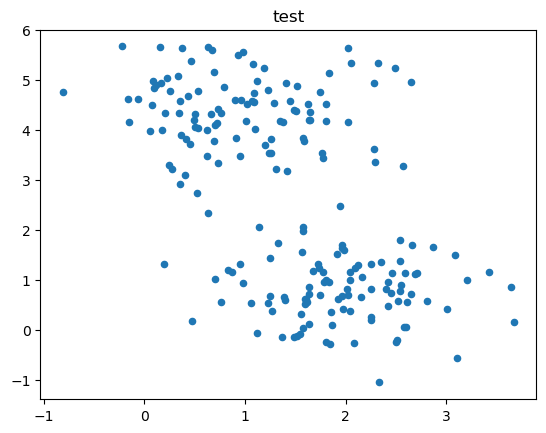

In [31]:
X, y_true = make_blobs(n_samples=200, centers=k, cluster_std=0.7, random_state=0)

plt.title("test")
plt.scatter(X[:, 0], X[:, 1], s=20)
plt.show()

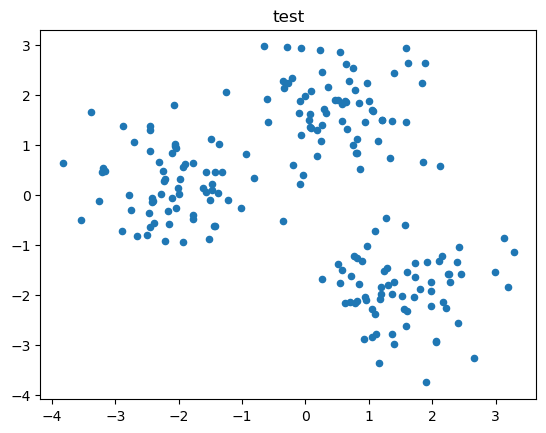

In [11]:
centroid = np.mean(X, axis=0)
X2 = X - centroid
#dist2 = np.max(dist) - dist
#X2 = X + np.expand_dims(dist, axis=1)

plt.title("test")
plt.scatter(X2[:, 0], X2[:, 1], s=20)
plt.show()

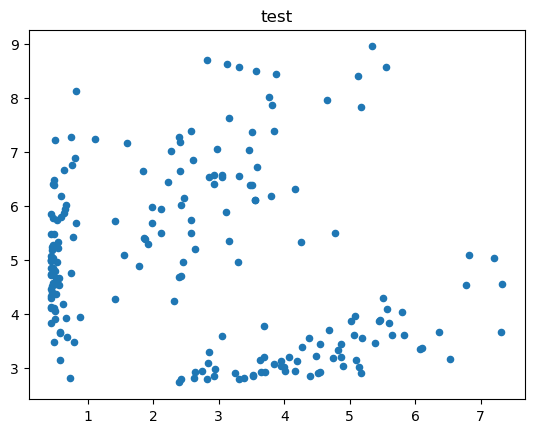

In [10]:
centroid = np.mean(X, axis=0)
dist = np.linalg.norm(X - centroid, axis=1)
#dist2 = np.max(dist) - dist
X2 = X + np.expand_dims(dist, axis=1)

plt.title("test")
plt.scatter(X2[:, 0], X2[:, 1], s=20)
plt.show()

In [ ]:
iris_data = datasets.load_iris(as_frame=True)
iris_df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)

algorithm = ExactClusterEditingAntiClustering()

df = algorithm.run(
    df=iris_df,
    numerical_columns=list(iris_df.columns),
    categorical_columns=None,
    num_groups=2,
    destination_column='Cluster'
)